<a href="https://colab.research.google.com/github/MrFulani/SuleimanAbubakar/blob/main/Suleiman_Abubakar's_Notebook_Expresso_Churn_DSN_ipynb(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predicting Customer Churn for Expresso Telecommunications Using a Machine Learning Approach

**Introduction**

Expresso telecommunication is an African company that wants to identify customers that are likely to be inactive (no transactions for 90 days) to be able to better serve them. The model will be evaluated using log loss with values ranging from 0 to 1 ( customer stayed and chuened respectively).

**Methodology**
Throughout this project, CRISP-DM (Cross Industries Standard Process for Data Mining) Methodology will be Use

**Techniques**
This project will use Python tools and techniques such as Pandas, NumPy, Seaborn and Matplotlib for easy prediction of inactive Customers.

**Goal**
The goal is to use ML to predict Customer Curn for Expresso, an African Telecommunication Company.

## Dataset Understanding and Description
The Exploratory Data Analysis (EDA) will help us extract insights, understand the data's potential, and prepare it for modeling. Through EDA processes, the questions of the Expresso will be answered, test hypotheses and uncover new areas to explore, ultimately informing my approach to predictiong inactive customers.

The churn dataset includes 19 variables, consisting of 15 numeric variables and 4 categorical variables. Below are the definitions and descriptions of each variable:

**user_id:** Unique identifier for each client.

**REGION:** The location of each client.

**TENURE:** Duration the client has been in the network.

**MONTANT:** Top-up amount.

**FREQUENCE_RECH:** Number of times the customer refilled.

**REVENUE:** Monthly income of each client.

**ARPU_SEGMENT:** Income over 90 days divided by 3 (Average Revenue Per User segment).

**FREQUENCE:** Number of times the client has made an income.

**DATA_VOLUME:** Number of connections or data usage.

**ON_NET:** Number of inter-Expresso calls.

**ORANGE:** Number of calls to the Orange network.

**TIGO:** Number of calls to the Tigo network.

**ZONE1:** Number of calls to Zone1.

**ZONE2:** Number of calls to Zone2.

**MRG:** Indicates if a client is going to churn.

**REGULARITY:** Number of times the client is active over 90 days.

**TOP_PACK:** The most frequently used packs by the client.

**FREQ_TOP_PACK:** Number of times the client has activated the top pack packages.

**CHURN:** Target variable indicating whether the client will churn.

In [1]:
# Import Libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [2]:
# Load the dataset
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

In [3]:
train.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,SAINT-LOUIS,K > 24 month,17000.0,32.0,18000.0,6000.0,34.0,NaN,97.0,355.0,6.0,NaN,NaN,NO,62,All-net 500F=2000F;5d,35.0,0
1,71c44b5ba328db5c4192a80f7cf8f244d9350ed0,NaN,K > 24 month,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,NaN,2.0,NO,40,"Data: 100 F=40MB,24H",22.0,0
2,ce46411b1526c94f20a383b8cb188f8d27f82a0a,TAMBACOUNDA,K > 24 month,1500.0,3.0,1500.0,500.0,3.0,NaN,30.0,30.0,NaN,NaN,NaN,NO,32,All-net 500F=2000F;5d,3.0,0
3,f467cdb6669818373c26c2bad44e01ba66f97d21,FATICK,K > 24 month,1500.0,3.0,2497.0,832.0,4.0,0.0,159.0,45.0,19.0,NaN,NaN,NO,18,On net 200F=Unlimited _call24H,3.0,0
4,ec45e1a1888a32b5dcce0954cfec20c6e037db31,FATICK,K > 24 month,NaN,NaN,498.0,166.0,3.0,1.0,1.0,3.0,NaN,NaN,NaN,NO,50,NaN,NaN,0


In [4]:
test.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,af900d87e73b7ff6509d2203df4704a98aa5f2a6,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN
1,5335efd940280b82143272275637d1e65d37eadb,NaN,K > 24 month,NaN,NaN,10.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN
2,a581f4fa08677c26f83f643248c667e241043086,NaN,K > 24 month,1900.0,15.0,2299.0,766.0,21.0,414.0,NaN,7.0,2.0,NaN,NaN,NO,27,"Data: 100 F=40MB,24H",17.0
3,64f67177d0775262b8087a9e2e3b8061b6324ae6,DAKAR,K > 24 month,3000.0,9.0,2603.0,868.0,14.0,332.0,0.0,23.0,4.0,NaN,NaN,NO,46,IVR Echat_Daily_50F,3.0
4,0d6009a4594c4be22449b8d9cc01a0bcea98faea,DAKAR,K > 24 month,32000.0,47.0,33000.0,11000.0,47.0,NaN,128.0,555.0,280.0,NaN,NaN,NO,61,All-net 500F=2000F;5d,65.0


In [5]:
sample_sub = pd.read_csv("sample_submission.csv")

In [6]:
sample_sub.head()

,user_id,CHURN
0,af900d87e73b7ff6509d2203df4704a98aa5f2a6,0
1,5335efd940280b82143272275637d1e65d37eadb,0
2,a581f4fa08677c26f83f643248c667e241043086,0
3,64f67177d0775262b8087a9e2e3b8061b6324ae6,0
4,0d6009a4594c4be22449b8d9cc01a0bcea98faea,0


In [7]:
import warnings
warnings.filterwarnings("ignore")

##Exploratory Data Analysis (EDA)


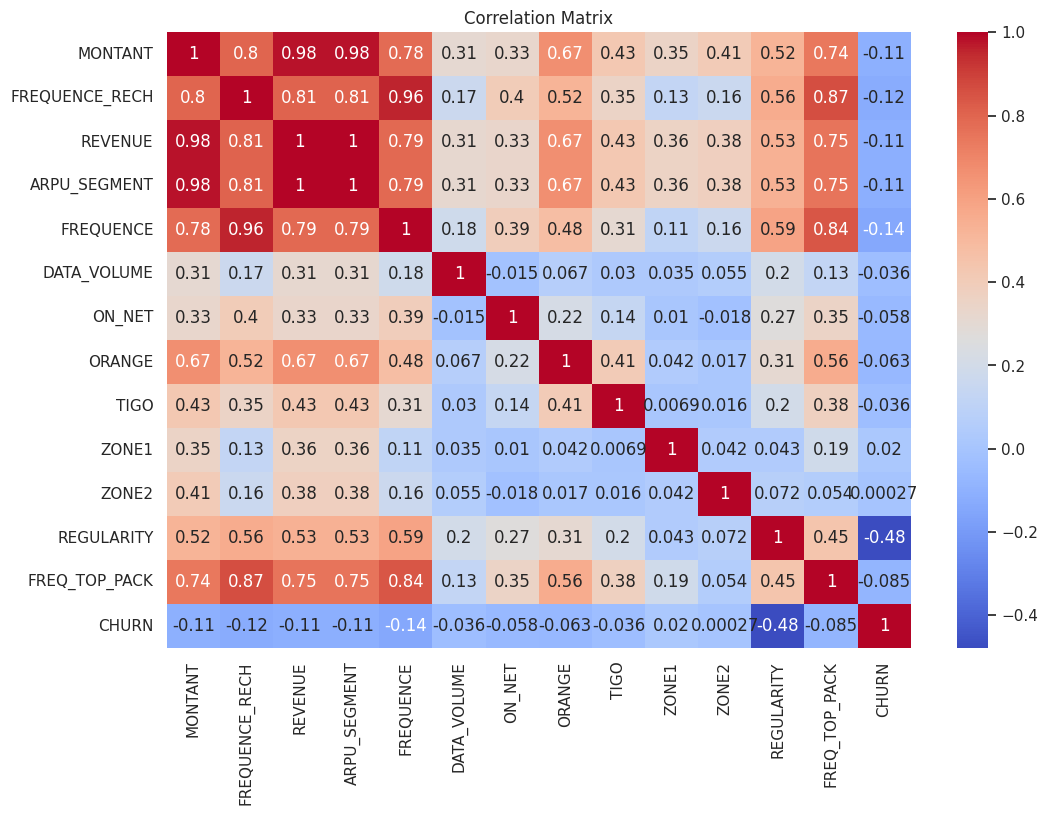

In [8]:
# Select numeric columns
numeric_train = train.select_dtypes(include=np.number)

# Calculate correlation
correlation = numeric_train.corr()

# Continue with your plotting code
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

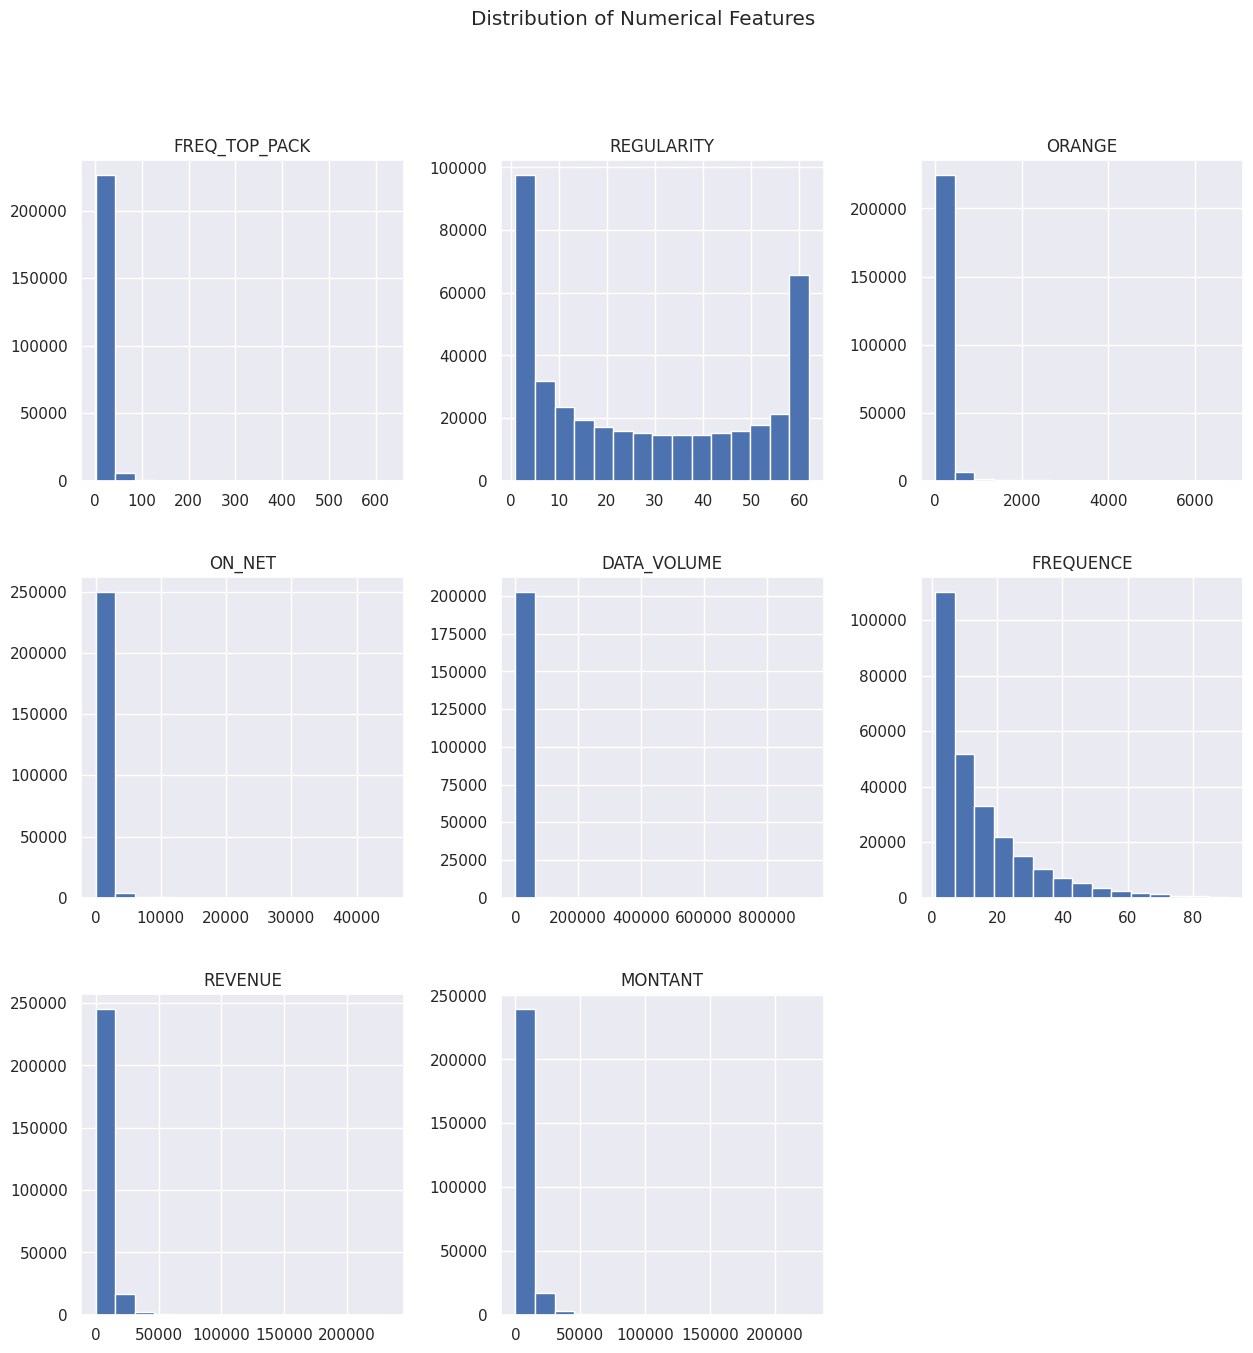

In [9]:
# Plot histograms for numerical features
numerical_features = ["FREQ_TOP_PACK", "REGULARITY", "ORANGE", "ON_NET", "DATA_VOLUME", "FREQUENCE", "REVENUE", "MONTANT"]
train[numerical_features].hist(figsize=(15, 15), bins=15)
plt.suptitle('Distribution of Numerical Features')
plt.show()


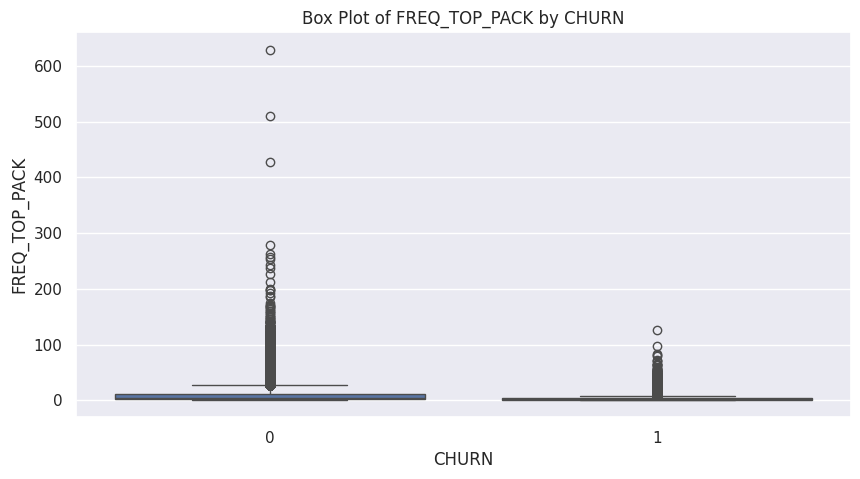

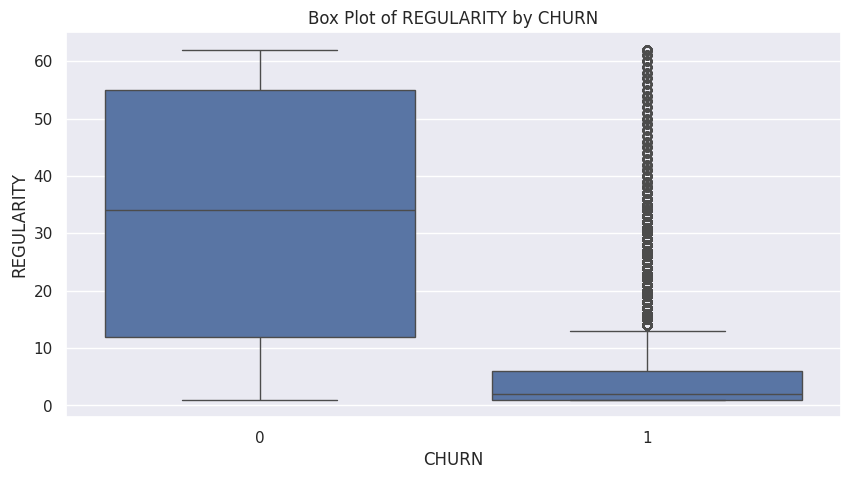

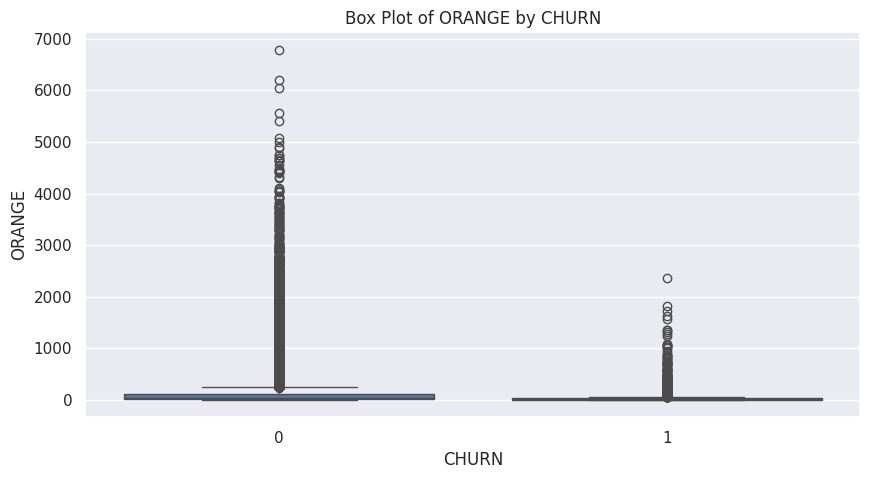

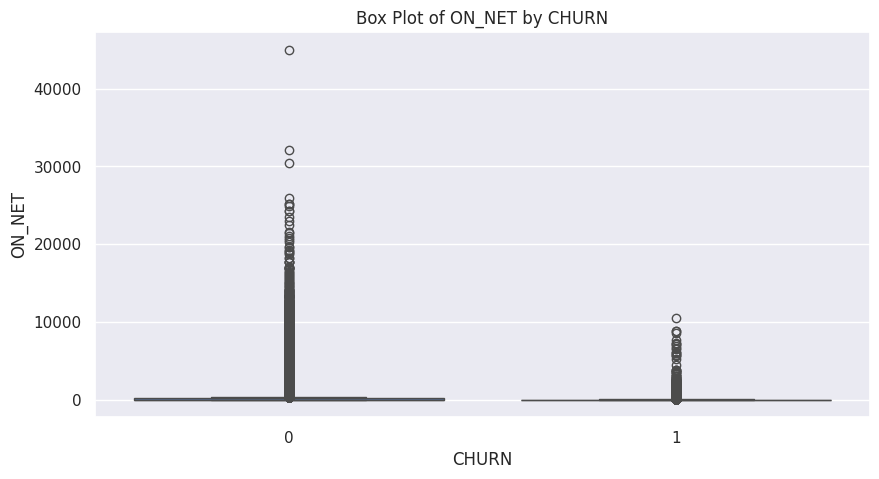

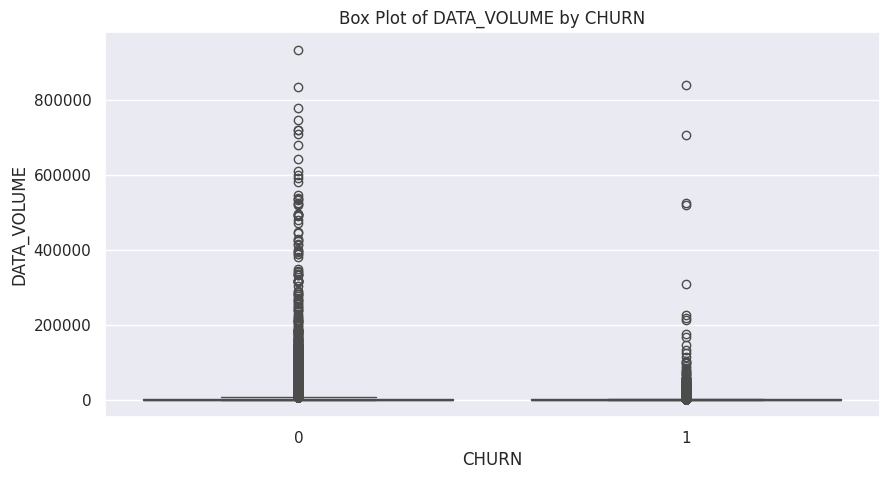

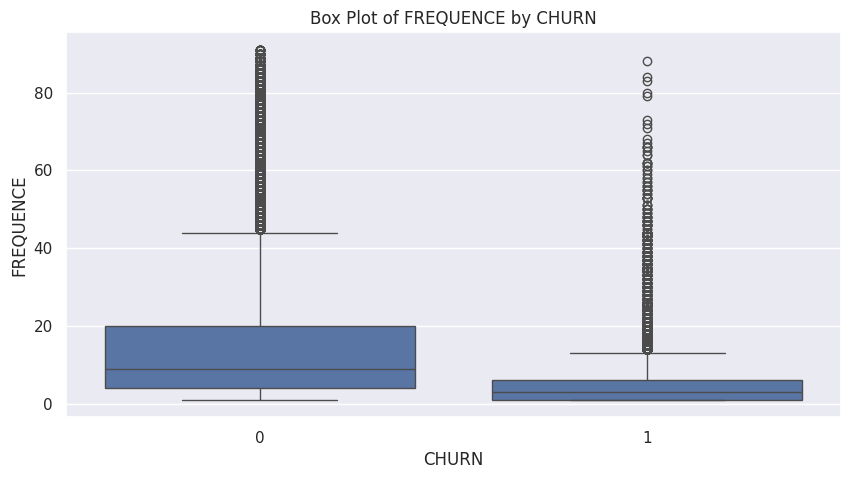

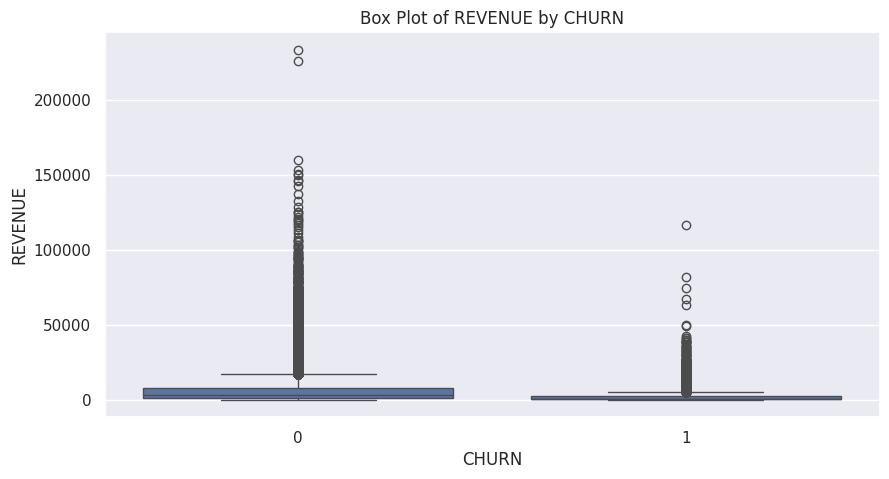

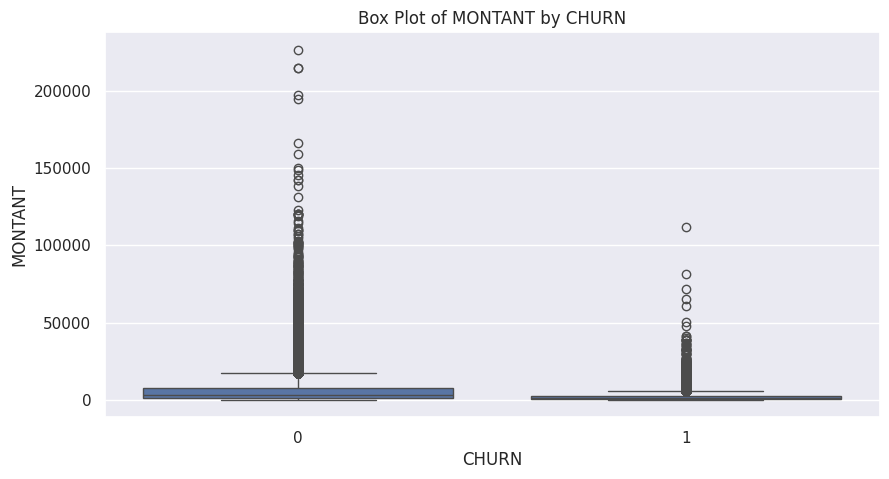

In [10]:
# Plot box plots for numerical features
for col in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='CHURN', y=col, data=train)
    plt.title(f'Box Plot of {col} by CHURN')
    plt.show()


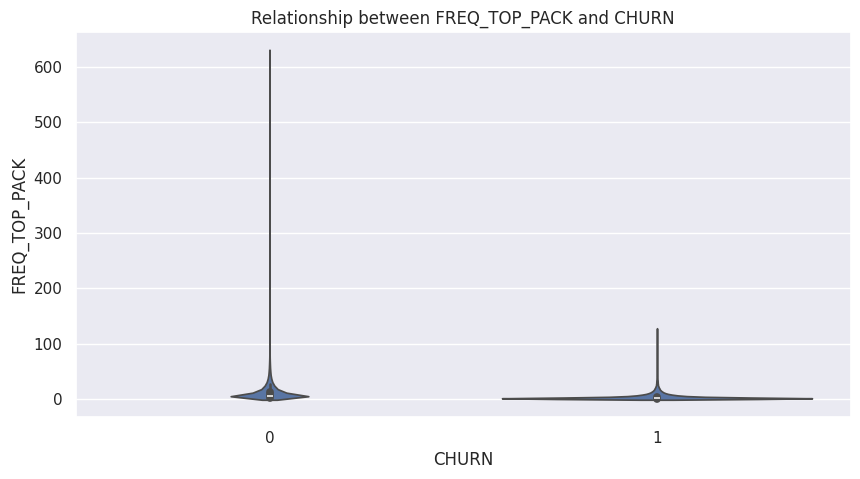

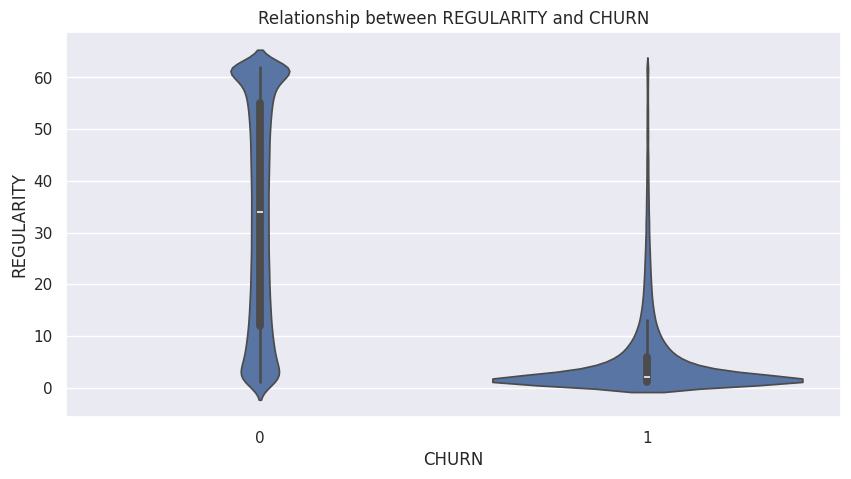

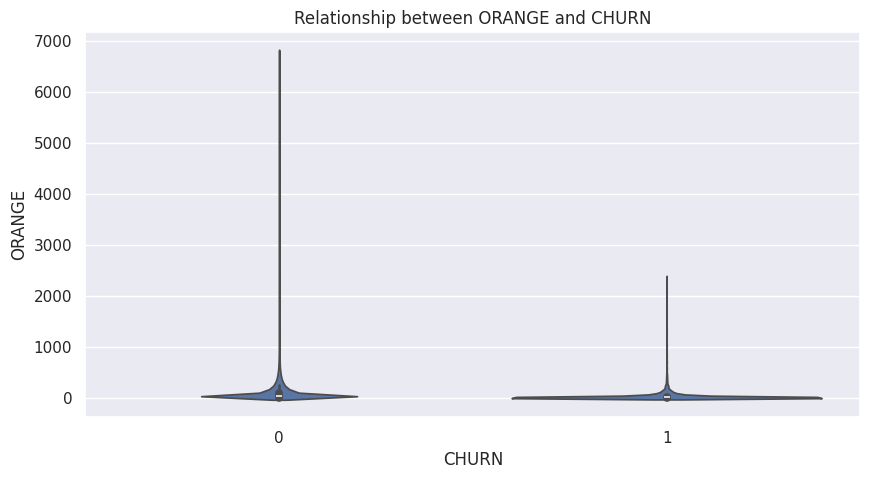

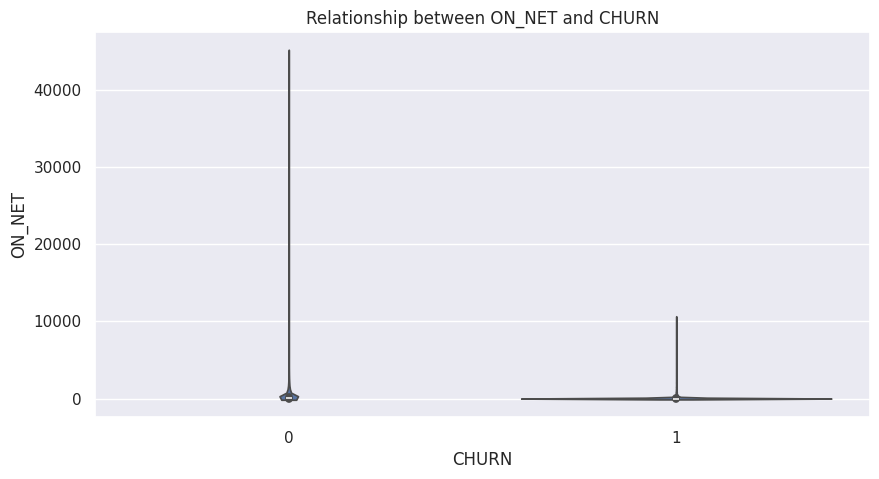

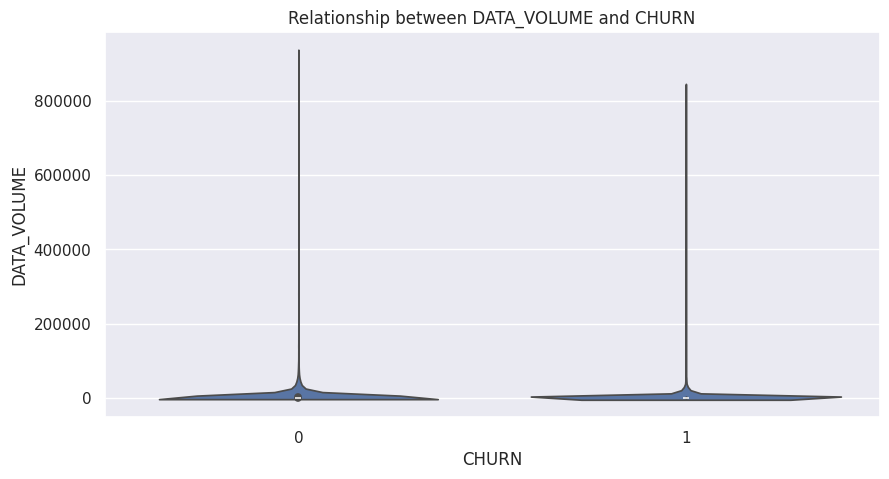

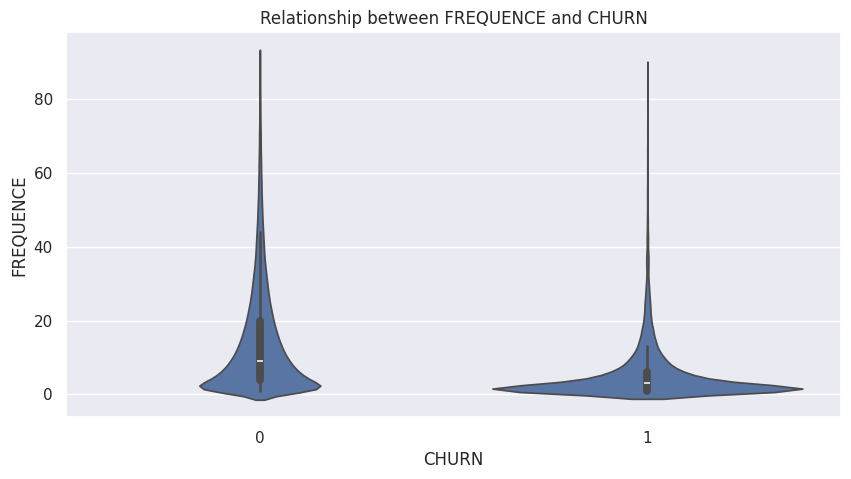

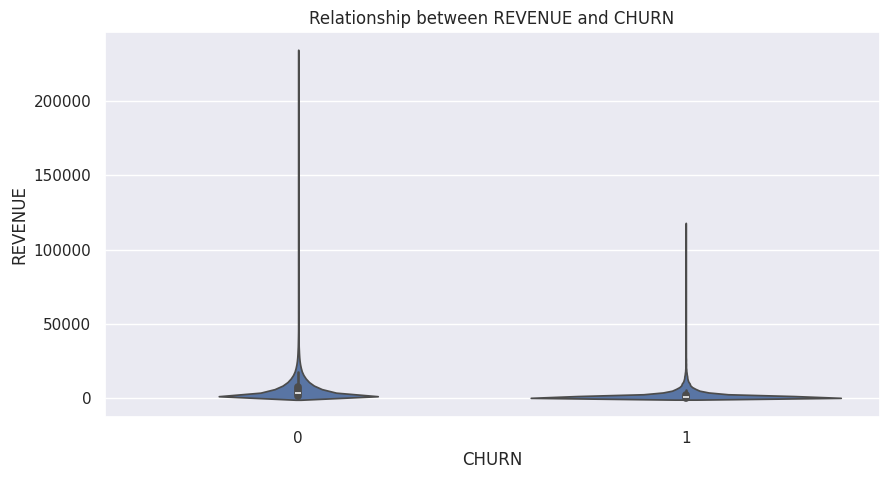

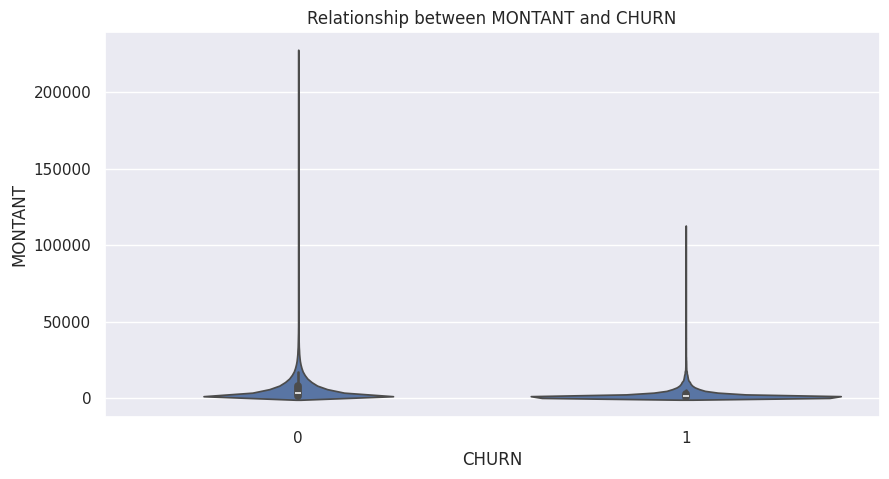

In [11]:
# Plot the relationship between numerical features and the target variable
for col in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.violinplot(x='CHURN', y=col, data=train)
    plt.title(f'Relationship between {col} and CHURN')
    plt.show()

In [12]:
print(train.dtypes)

user_id            object
REGION             object
TENURE             object
MONTANT           float64
FREQUENCE_RECH    float64
REVENUE           float64
ARPU_SEGMENT      float64
FREQUENCE         float64
DATA_VOLUME       float64
ON_NET            float64
ORANGE            float64
TIGO              float64
ZONE1             float64
ZONE2             float64
MRG                object
REGULARITY          int64
TOP_PACK           object
FREQ_TOP_PACK     float64
CHURN               int64
dtype: object


In [13]:
# Calculate the correlation of features with the target variable 'CHURN'
correlation_with_target = numeric_train.corr()['CHURN'].sort_values(ascending=False)
correlation_with_target

,CHURN
CHURN,1.000000
ZONE1,0.019937
ZONE2,0.000273
TIGO,-0.035890
DATA_VOLUME,-0.036015
ON_NET,-0.057701
ORANGE,-0.063382
FREQ_TOP_PACK,-0.085136
MONTANT,-0.106229
REVENUE,-0.114822


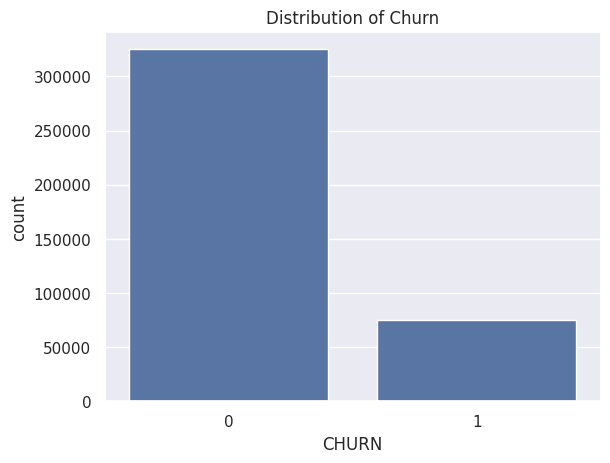

In [14]:
# Visualizing the target variable 'CHURN'
sns.countplot(x='CHURN', data=train)
plt.title('Distribution of Churn')
plt.show()

In [15]:
# Descriptive statistics of the training data
train.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
count,259723.000000,259723.000000,265337.000000,265337.000000,265337.000000,203146.000000,254181.000000,233683.000000,160614.000000,31690.000000,25513.000000,400000.000000,232671.000000,400000.00000
mean,5522.971346,11.503733,5505.487757,1835.167658,13.951835,3369.763441,275.917586,95.532927,23.134608,7.874282,7.187003,28.046502,9.254209,0.18711
std,7099.640630,13.275514,7175.802367,2391.929290,14.679943,12281.867504,873.593034,204.733272,63.061871,35.642843,26.964028,22.282773,12.305563,0.39000
min,20.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.00000
25%,1000.000000,2.000000,1000.000000,333.000000,3.000000,0.000000,5.000000,7.000000,2.000000,0.000000,0.000000,6.000000,2.000000,0.00000
50%,3000.000000,6.000000,3000.000000,1000.000000,9.000000,267.000000,27.000000,29.000000,6.000000,1.000000,2.000000,24.000000,5.000000,0.00000
75%,7300.000000,15.000000,7340.000000,2447.000000,19.000000,2925.000000,155.000000,99.000000,20.000000,3.000000,5.000000,51.000000,12.000000,0.00000
max,226550.000000,133.000000,233413.000000,77804.000000,91.000000,934576.000000,45011.000000,6788.000000,2758.000000,1657.000000,1011.000000,62.000000,629.000000,1.00000


## Data Preprocessing

Preprocess the data before feeding it into the model. This includes handling missing values, encoding categorical variables, and feature scaling.

In [16]:
# Dropping target variable from training data
churn = train['CHURN']
train = train.drop('CHURN', axis=1)

In [17]:
# Combine train and test data for uniform preprocessing
data = pd.concat([train, test], sort=False)
data.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,SAINT-LOUIS,K > 24 month,17000.0,32.0,18000.0,6000.0,34.0,NaN,97.0,355.0,6.0,NaN,NaN,NO,62,All-net 500F=2000F;5d,35.0
1,71c44b5ba328db5c4192a80f7cf8f244d9350ed0,NaN,K > 24 month,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,NaN,2.0,NO,40,"Data: 100 F=40MB,24H",22.0
2,ce46411b1526c94f20a383b8cb188f8d27f82a0a,TAMBACOUNDA,K > 24 month,1500.0,3.0,1500.0,500.0,3.0,NaN,30.0,30.0,NaN,NaN,NaN,NO,32,All-net 500F=2000F;5d,3.0
3,f467cdb6669818373c26c2bad44e01ba66f97d21,FATICK,K > 24 month,1500.0,3.0,2497.0,832.0,4.0,0.0,159.0,45.0,19.0,NaN,NaN,NO,18,On net 200F=Unlimited _call24H,3.0
4,ec45e1a1888a32b5dcce0954cfec20c6e037db31,FATICK,K > 24 month,NaN,NaN,498.0,166.0,3.0,1.0,1.0,3.0,NaN,NaN,NaN,NO,50,NaN,NaN


In [18]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values

,0
user_id,0
REGION,196813
TENURE,0
MONTANT,175228
FREQUENCE_RECH,175228
REVENUE,168153
ARPU_SEGMENT,168153
FREQUENCE,168153
DATA_VOLUME,246192
ON_NET,182202


##Handling the missing values

In [19]:
# Calculate the percentage of missing values
missing_percentage = (missing_values / len(data)) * 100

# Combine the missing values and their percentages into a DataFrame
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

# Display the DataFrame sorted by percentage of missing values in descending order
missing_data = missing_data[missing_data['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)

In [20]:
missing_data

,Missing Values,Percentage
ZONE2,468065,93.6130
ZONE1,460630,92.1260
TIGO,299174,59.8348
DATA_VOLUME,246192,49.2384
TOP_PACK,209032,41.8064
FREQ_TOP_PACK,209032,41.8064
ORANGE,207517,41.5034
REGION,196813,39.3626
ON_NET,182202,36.4404
MONTANT,175228,35.0456


In [21]:
# Drop columns with too many missing values or not useful for the model
data = data.drop(['ZONE1', 'ZONE2'], axis=1)

In [22]:
# Fill missing values in categorical columns with "Missing_{column_name}"
for col in data.select_dtypes(include=['object']).columns:
    data[col].fillna(f'Missing_{col}', inplace=True)

# Fill missing values in numerical columns with the median
for col in data.select_dtypes(include=[np.number]).columns:
    data[col].fillna(data[col].median(), inplace=True)

# Verify that there are no missing values left
data.isnull().sum()

,0
user_id,0
REGION,0
TENURE,0
MONTANT,0
FREQUENCE_RECH,0
REVENUE,0
ARPU_SEGMENT,0
FREQUENCE,0
DATA_VOLUME,0
ON_NET,0


In [23]:
# View Overcorrelated columns
data[['REVENUE','ARPU_SEGMENT']]

,REVENUE,ARPU_SEGMENT
0,18000.0,6000.0
1,4427.0,1476.0
2,1500.0,500.0
3,2497.0,832.0
4,498.0,166.0
...,...,...
99995,20.0,7.0
99996,998.0,333.0
99997,1799.0,600.0
99998,2515.0,838.0


In [24]:
# Drop Overcorrelated columns
data = data.drop(['REVENUE'], axis=1)

##Handling categorical columns

In [25]:
# Display the number of unique categories in all object columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Create a DataFrame to display the results
unique_categories = pd.DataFrame({
    'Column': categorical_columns,
    'Unique Categories': [data[col].nunique() for col in categorical_columns]
})

unique_categories = unique_categories.sort_values(by='Unique Categories', ascending=False)
unique_categories

,Column,Unique Categories
0,user_id,500000
4,TOP_PACK,113
1,REGION,15
2,TENURE,8
3,MRG,1


In [26]:
data['MRG'].value_counts()

,count
MRG,
NO,500000


In [27]:
data = data.drop(['MRG'], axis=1)

In [28]:
# Encode categorical variables
data = pd.get_dummies(data, columns=['REGION', 'TOP_PACK', 'TENURE'], drop_first=True)

In [29]:
# Drop the 'user_id' as it is not useful for the model
data = data.drop('user_id', axis=1)

In [30]:
# Split the combined data back into train and test sets
train = data.iloc[:len(churn), :]
test = data.iloc[len(churn):, :]

##Model Building

In [31]:
!pip install catboost==1.2.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 6.6 MB/s eta 0:00:00


In [32]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, log_loss, confusion_matrix

In [33]:
# Splitting the training data into train and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(train, churn, test_size=0.2, random_state=42)

In [34]:
# Initializing and training the CatBoostClassifier
classifier = CatBoostClassifier(loss_function='Logloss', learning_rate=0.01, use_best_model=True, eval_metric='Logloss')
classifier.fit(X_train, Y_train, eval_set=(X_val, Y_val), early_stopping_rounds=100, verbose=100)

0:	learn: 0.6759825	test: 0.6759611	best: 0.6759611 (0)	total: 197ms	remaining: 3m 16s
100:	learn: 0.2728430	test: 0.2746610	best: 0.2746610 (100)	total: 10s	remaining: 1m 29s
200:	learn: 0.2559864	test: 0.2589313	best: 0.2589313 (200)	total: 19.8s	remaining: 1m 18s
300:	learn: 0.2534964	test: 0.2569310	best: 0.2569310 (300)	total: 27.4s	remaining: 1m 3s
400:	learn: 0.2526503	test: 0.2563357	best: 0.2563357 (400)	total: 37s	remaining: 55.3s
500:	learn: 0.2521592	test: 0.2560377	best: 0.2560377 (500)	total: 46.5s	remaining: 46.3s
600:	learn: 0.2518132	test: 0.2558615	best: 0.2558613 (599)	total: 53.9s	remaining: 35.8s
700:	learn: 0.2515428	test: 0.2557337	best: 0.2557337 (700)	total: 1m 3s	remaining: 27s
800:	learn: 0.2513057	test: 0.2556427	best: 0.2556427 (800)	total: 1m 11s	remaining: 17.8s
900:	learn: 0.2511102	test: 0.2555629	best: 0.2555625 (899)	total: 1m 19s	remaining: 8.77s
999:	learn: 0.2509209	test: 0.2554966	best: 0.2554966 (999)	total: 1m 29s	remaining: 0us

bestTest = 0.25

##Model Evaluation
Evaluating the model on the validation set

In [35]:
Y_pred = classifier.predict(X_val)
print("Accuracy:", accuracy_score(Y_val, Y_pred))
print("Classification Report:\n", classification_report(Y_val, Y_pred))

Accuracy: 0.877425
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93     65023
           1       0.68      0.65      0.66     14977

    accuracy                           0.88     80000
   macro avg       0.80      0.79      0.79     80000
weighted avg       0.88      0.88      0.88     80000



In [36]:
# Predicting probabilities for log loss calculation
Y_pred_proba = classifier.predict_proba(X_val)[:, 1]
print("Log Loss:", log_loss(Y_val, Y_pred_proba))

Log Loss: 0.2554965919777514


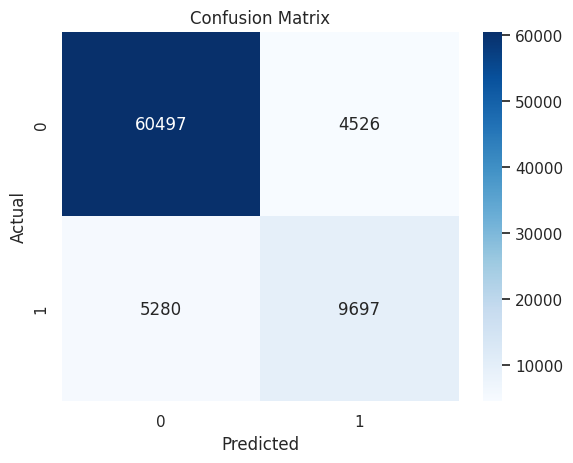

In [37]:
# Confusion matrix
cm = confusion_matrix(Y_val, Y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

##Feature Importance
Plotting feature importances to understand which features the model found most useful

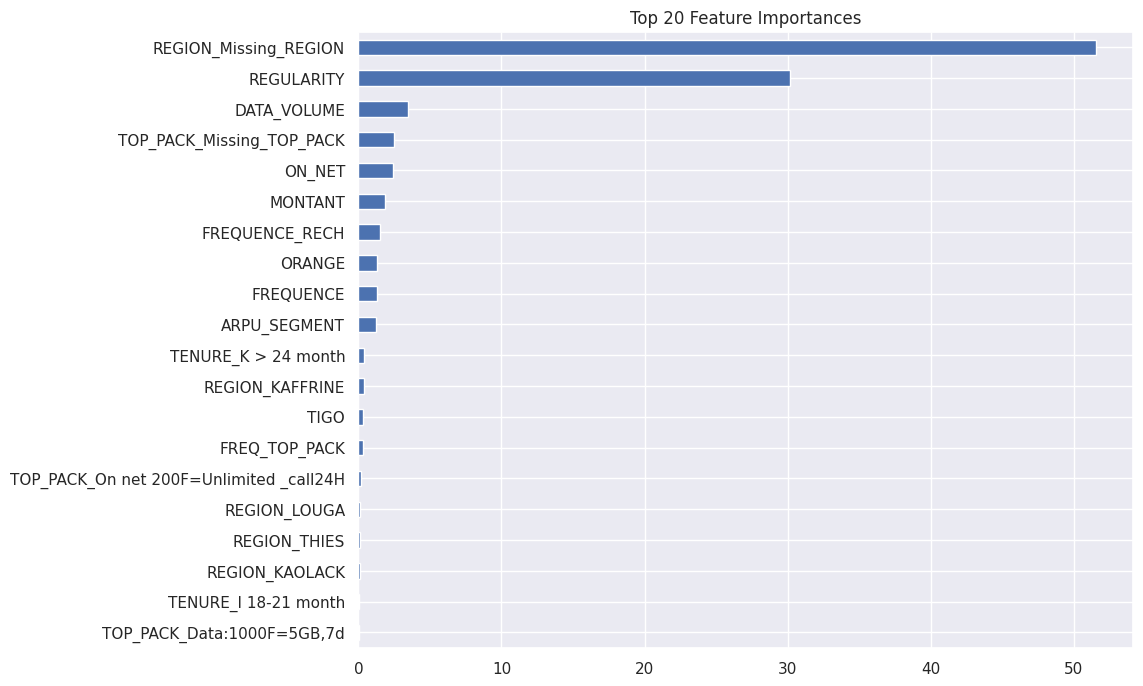

In [38]:
# Get the feature importances from the classifier
feature_importances = pd.Series(classifier.feature_importances_, index=X_train.columns)

# Sort the feature importances and select the top 20
top_20_features = feature_importances.sort_values(ascending=False).head(20)

# Plot the top 20 feature importances
top_20_features.sort_values().plot(kind='barh', figsize=(10, 8))
plt.title('Top 20 Feature Importances')
plt.show()

In [39]:
## Making Predictions on Test Data
# Finally, we use the trained model to make predictions on the test set and prepare the submission file.
predictions = classifier.predict_proba(test)[:, 1]
baseline_sub = sample_sub.copy()
baseline_sub['CHURN'] = predictions
baseline_sub.to_csv('baseline_submission_catboost_expresso.csv', index=False)

# Display the first few rows of the submission file
baseline_sub.head()

,user_id,CHURN
0,af900d87e73b7ff6509d2203df4704a98aa5f2a6,0.784325
1,5335efd940280b82143272275637d1e65d37eadb,0.650424
2,a581f4fa08677c26f83f643248c667e241043086,0.122757
3,64f67177d0775262b8087a9e2e3b8061b6324ae6,0.001168
4,0d6009a4594c4be22449b8d9cc01a0bcea98faea,0.000282
